# Calculadora de frames

Este script toma videos y da como resultado un archivo csv con la diferencia entre todos los fotogramas contiguos con el objetivo de detectar movimiento de manera simple.

Para ello extrae los fotogramas, los resta, y a la imagen resultante se le calcula la media, el desvio estandar, el máximo y el mínimo. Luego guarda la matriz en un archivo .csv.

In [131]:
# Librerias
import os
import numpy as np
from matplotlib import pyplot as plt

In [132]:
# functions
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)    
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

In [140]:
folder_path = "C:/Users/charl/Documents/Doctorado/Videos/Experment/181021/Test 1"
file_name = 'Video 1233grayvalues.csv'

file_path = folder_path+'/'+file_name
greayvalue_data = np.genfromtxt(file_path, delimiter=',')
greayvalue_data.T

array([[ 0.13592665,  0.13050781,  0.13074219, ...,  0.13598416,
         0.13511936,  0.13604818],
       [ 0.41938497,  0.41399016,  0.40940364, ...,  0.41650916,
         0.41510401,  0.41893913],
       [13.        , 10.        , 11.        , ...,  9.        ,
        13.        , 10.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [136]:
folder_path = "C:/Users/charl/Documents/Doctorado/Videos/Experment/181021/Test 1"
file_name = 'Video 1233grayvalues.csv'

file_path = folder_path+'/'+file_name
greayvalue_data = np.genfromtxt(file_path, delimiter=',')

#normalized_data = normalize(greayvalue_data[:,0], 0 , 1)
normalized_data = []
for vector_values in greayvalue_data.T:
    normalize(vector_values[:,0], 0 , 1)


for i,value in enumerate(normalized_data):
    if value > 0.5:
        normalized_data[i] = (normalized_data[i-1]+normalized_data[i+1])/2

normalized_data = normalize(normalized_data,0,1)

softed_data = []
for i, value in enumerate(normalized_data):
    desde = max(i-7,0)
    hasta = min(i+7,len(normalized_data)-1)
    softed_data.append(sum(normalized_data[desde:hasta])/len(normalized_data[desde:hasta]))
normalized_data = softed_data

normalized_data = normalize(normalized_data,0,1)

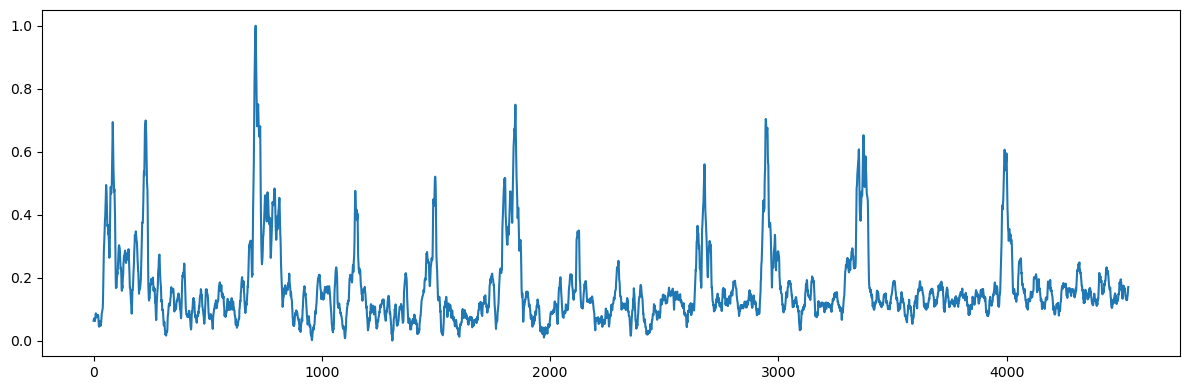

In [138]:
_, ax = plt.subplots(1,1,figsize=(12,4),layout='tight')
ax.plot(range(len(normalized_data)),normalized_data)
